<a href="https://colab.research.google.com/github/Fathelrahman-Elmisbah/deep-neural-network-from-scratch/blob/master/deep_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def initialize_parameters(dims, initialization_ratio):
  dims = np.array(dims).reshape(-1,1)
  L = dims.shape[0] 
  parameters = {}
  for i in range(1,L):
    dim = dims[i,0]
    pdim = dims[i-1,0]
    W = np.random.randn(dim,pdim) * initialization_ratio
    b = np.zeros((dim,1))
    parameters['W'+str(i)] = W
    parameters['b'+str(i)] = b
  return parameters   

In [0]:
# test initialize_parameters

dims = [2,3,1]
parameters = initialize_parameters(dims, .01)

assert(parameters['W1'].shape == (3,2))
assert(parameters['b2'].shape == (1,1))
assert(len(parameters) == 4)

In [0]:
def forward_linear_step(A_prev, W, b):
  Z = W @ A_prev + b
  cache = {}
  cache['W'] = W
  cache['A_prev'] = A_prev
  assert(Z.shape == (W.shape[0],A_prev.shape[1]))
  return Z, cache

In [0]:
# test forward_linear_step

A_prev = np.array([[2,3,1],[-2,-1,0]])
W = np.array([[1,1],[0,3]])
b = np.array([[-3],[2]]).reshape((2,1))
Z, cache = forward_linear_step(A_prev, W, b)

assert(Z.shape == (2,3))
assert(Z[1,1] == -1)
assert(cache['W'][1,1] == 3)

In [0]:
def forward_activation_step(Z, activation):
  if activation == 'relu':
    A = np.maximum(Z,0)
    cache = Z
  elif activation == 'tanh':
    A = np.tanh(Z)
    cache = A
  elif activation == 'sigmoid':
    A = 1 / (1 + np.exp(-Z))
    cache = A
  assert(A.shape == Z.shape)  
  return A, cache

In [0]:
# test forward_activation_step

Z = np.array([[1],[2],[1]]).reshape((3,1))
A, cache = forward_activation_step(Z,'relu')

assert(A[1,0] == 2)
assert(cache[2,0] == 1)


A, cache = forward_activation_step(Z,'sigmoid')

assert(abs(A[2,0] - .7310585) < .0000001)
assert(cache[0,0] == A[0,0])


A, cache = forward_activation_step(Z,'tanh')
assert(abs(A[0,0] - .76159416) < .0000001)
assert(cache[2,0] == A[2,0])

In [0]:
def forward_step(A_prev, W, b, activation):
  Z, linear_cache = forward_linear_step(A_prev, W, b)
  A, activation_cache = forward_activation_step(Z, activation)
  cache = (linear_cache, activation_cache)
  assert(A.shape == (W.shape[0], A_prev.shape[1]))
  return A, cache

In [0]:
# test forward_step

A_prev = np.array([[2,3,1],[-2,-1,0]])
W = np.array([[1,1],[0,3]])
b = np.array([[-3],[2]]).reshape((2,1))
A, cache = forward_step(A_prev, W, b, 'relu')
linear_cache, activation_cache = cache

assert(A.shape == (2,3))
assert(A[1,1] == 0)
assert(A[1,2] == 2)
assert(linear_cache['W'][1,1] == 3)
assert(activation_cache[1,1] == -1)

In [0]:
def forward_propagation(X, parameters, activations):
  L = len(parameters) // 2
  caches = []
  A = X
  if len(activations) == 0:
    activations = ['relu'] * (L - 1) + ['sigmoid']
  for i in range(1,L + 1):
    A_prev = A
    W = parameters['W'+str(i)]
    b = parameters['b'+str(i)]
    activation = activations[i-1]
    A, cache = forward_step(A_prev, W, b, activation)
    caches.append(cache)
  AL = A  
  assert(AL.shape == (parameters['W'+str(L)].shape[0],X.shape[1]))  
  return AL, caches

In [0]:
# test forward_propagation

X = np.array([[2,3,1],[-2,-1,0]])
W1 = np.array([[1,1],[0,3]])
b1 = np.array([[-3],[2]]).reshape((2,1))
W2 = np.array([2,1]).reshape((1,2))
b2 = np.array([[5]]).reshape((1,1))
parameters = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
AL, caches = forward_propagation(X, parameters, [])
linear_cache1, activation_cache1 = caches[0]
linear_cache2, activation_cache2 = caches[1]

assert(AL.shape == (1,3))
assert(linear_cache1['W'].shape == (2,2))
assert(activation_cache1.shape == (2,3))
assert(activation_cache2.shape == (1,3))
assert(abs(AL[0,2] - .99908895) < .00000001)
assert(abs(AL[0,0] - .99330715) < .00000001)
assert(activation_cache1[1,0] == -4)
assert(activation_cache2[0,2] == AL[0,2])

In [0]:
def log_cost(Y, AL):
  cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / Y.shape[1]
  return cost

In [0]:
# test log_cost

AL = np.array([.8,.2]).reshape((1,2))
Y = np.array([0,1]).reshape((1,2))
cYAL = log_cost(Y, AL)
assert(abs(cYAL - 1.6094379) < .0000001)

In [14]:
def grad_log_cost(Y, AL):
  S = np.copy(AL)
  S[S == 0] += .00001
  S[S == 1] -= .00001
  dAL = (1 - Y) / (1 - S) - Y / S
  assert(dAL.shape, AL.shape)
  return dAL

<ipython-input-14-e6c79ba3206a>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(dAL.shape, AL.shape)


In [0]:
def backward_linear_step(dZ, cache):
  W = cache['W']
  A_prev = cache['A_prev']
  m = dZ.shape[1]
  dA_prev = W.T @ dZ
  dW = (dZ @ A_prev.T) / m
  db = np.sum(dZ, axis = 1, keepdims = True) / m
  assert(dA_prev.shape == A_prev.shape)
  assert(dW.shape == W.shape)
  assert(db.shape == (W.shape[0],1))
  return dA_prev, dW, db

In [0]:
#test backward_linear_step

alpha = .00001
beta = .0001
A_prev = np.array([[2,3.,1],[-2,-1,0]])
W = np.array([[1,1],[0,3.]])
b = np.array([[-3],[2.]]).reshape((2,1))
Z, cache = forward_linear_step(A_prev, W, b)

Z2 = np.copy(Z)
Z2[0,0] = Z2[0,0] + alpha
Y = np.sum(np.sum(Z))
Y2 = np.sum(np.sum(Z2))
dZ = ((Y2 - Y) / alpha) * np.ones(Z.shape)

W2 = np.copy(W)
W2[1,1] += alpha
Z2,_ = forward_linear_step(A_prev, W2, b)
Y2 = np.sum(np.sum(Z2))
dW11 = (Y2 - Y) / alpha / 3

b2 = np.copy(b)
b2[1,0] += alpha
Z2,_ = forward_linear_step(A_prev, W, b2)
Y2 = np.sum(np.sum(Z2))
db10 = (Y2 - Y) / alpha / 3

A_prev2 = np.copy(A_prev)
A_prev2[0,1] = A_prev2[0,1] + alpha
Z2,_ = forward_linear_step(A_prev2, W, b)
Y2 = np.sum(np.sum(Z2))
dA_prev01 = (Y2 - Y) / alpha

dA_prev, dW, db = backward_linear_step(dZ, cache)

assert(abs(dW11 - dW[1,1]) < beta)
assert(abs(db10 - db[1,0]) < beta)
assert(abs(dA_prev01 - dA_prev[0,1]) < beta)

In [0]:
def backward_activation_step(dA, cache, activation):
  if activation == 'relu':
    Z = np.copy(cache)
    Z[Z>=0] = 1
    Z[Z<0] = 0
    dZ = dA * Z
  elif activation == 'tanh':
    A = cache
    dZ = dA * (1 - A ** 2)
  elif activation == 'sigmoid':
    A = cache
    dZ = dA * A * (1 - A)
  assert(dZ.shape == dA.shape)  
  return dZ

In [0]:
#test backward_activation_step

alpha = .0000000001
beta = .000000001
Z = np.array([[1,2.,2],[3,2,1]])
A, cache = forward_activation_step(Z, 'relu')

A2 = np.copy(A)
A2[0,0] += alpha
Y = np.sum(np.sum(A))
Y2 = np.sum(np.sum(A2))
dA = (Y2 - Y) / alpha * np.ones(A.shape)

Z2 = np.copy(Z)
Z2[1,1] += alpha
A2, _ = forward_activation_step(Z2, 'relu')
Y2 = np.sum(np.sum(A2))
dZ11 = (Y2 - Y) / alpha

dZ = backward_activation_step(dA, cache, 'relu')

assert(abs(dZ11 - dZ[1,1]) < beta)

In [0]:
def backward_step(dA, cache, activation):
  linear_cache, activation_cache = cache
  dZ = backward_activation_step(dA, activation_cache, activation)
  dA_prev, dW, db = backward_linear_step(dZ, linear_cache)
  assert(dA_prev.shape == linear_cache['A_prev'].shape)
  assert(dW.shape == linear_cache['W'].shape)
  assert(db.shape == (linear_cache['W'].shape[0],1))
  return dA_prev, dW, db

In [0]:
#test backward_step

alpha = .000001
beta = .00001
A_prev = np.array([[2,3.,1],[2,1,0]])
W = np.array([[1.,1.],[0,3.]])
b = np.array([[-3],[2.]]).reshape((2,1))
A, cache = forward_step(A_prev, W, b, 'sigmoid')

A2 = np.copy(A)
A2[0,0] += alpha
Y = np.sum(np.sum(A))
Y2 = np.sum(np.sum(A2))
dA = (Y2 - Y) / alpha * np.ones(A.shape)

W2 = np.copy(W)
W2[1,1] = W2[1,1] + alpha
A2, _ = forward_step(A_prev, W2, b, 'sigmoid')
Y2 = np.sum(np.sum(A2))
dW11 = (Y2 - Y) / alpha / 3

b2 = np.copy(b)
b2[1,0] += alpha
A2, _ = forward_step(A_prev, W, b2, 'sigmoid')
Y2 = np.sum(np.sum(A2))
db10 = (Y2 - Y) / alpha / 3

A_prev2 = np.copy(A_prev)
A_prev2[0,1] += alpha
A2, _ = forward_step(A_prev2, W, b, 'sigmoid')
Y2 = np.sum(np.sum(A2))
dA_prev01 = (Y2 - Y) / alpha

dA_prev, dW, db = backward_step(dA, cache, 'sigmoid')


assert(abs(dW11 - dW[1,1]) < beta)
assert(abs(db10 - db[1,0]) < beta)
assert(abs(dA_prev01 - dA_prev[0,1]) < beta)

In [0]:
def backward_propagation(Y, AL, caches, activations):
  L = len(caches)
  if len(activations) == 0:
    activations = ['relu'] * (L - 1) + ['sigmoid']
  dA_prev = grad_log_cost(Y, AL)
  grads = {}
  for i in range(L,0,-1):
    dA = dA_prev
    cache = caches[i-1]
    activation = activations[i-1]
    dA_prev, dW, db = backward_step(dA, cache, activation)
    grads['dW'+str(i)] = dW
    grads['db'+str(i)] = db  
  return grads

In [0]:
#test backward_propagation

alpha = .000001
beta = .00001
X = np.array([[2.,3,1],[-2,-1,0]])
W1 = np.array([[1.,1],[0,3]])
b1 = np.array([[-3.],[2]]).reshape((2,1))
W2 = np.array([2,1.]).reshape((1,2))
b2 = np.array([[5.]]).reshape((1,1))
Y = np.array([1,1.,1]).reshape((1,3))
parameters = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
AL, caches = forward_propagation(X, parameters, [])

C = log_cost(Y,AL)

W1_2 = np.copy(W1)
W1_2[1,1] += alpha
parameters['W1'] = W1_2
AL2, caches = forward_propagation(X, parameters, [])
parameters['W1'] = W1
C2 = log_cost(Y,AL2)
dW1_11 = (C2 - C) / alpha

W1_2 = np.copy(W1)
W1_2[1,0] += alpha
parameters['W1'] = W1_2
AL2, caches = forward_propagation(X, parameters, [])
parameters['W1'] = W1
C2 = log_cost(Y,AL2)
dW1_10 = (C2 - C) / alpha

b2_2 = np.copy(b2)
b2_2[0,0] += alpha
parameters['b2'] = b2_2
AL2, caches = forward_propagation(X, parameters, [])
parameters['b2'] = b2
C2 = log_cost(Y,AL2)
db2_00 = (C2 - C) / alpha

grads = backward_propagation(Y, AL, caches, [])

assert(abs(dW1_11 - grads['dW1'][1,1]) < beta)
assert(abs(dW1_10 - grads['dW1'][1,0]) < beta)
assert(abs(db2_00 - grads['db2'][0,0]) < beta)

In [0]:
def update_parameters(parameters, grads, learning_rate):
  L = len(parameters) // 2
  new_parameters = {}
  for i in range(1,L + 1):
    new_parameters['W'+str(i)] = parameters['W'+str(i)] - learning_rate * grads['dW'+str(i)]
    new_parameters['b'+str(i)] = parameters['b'+str(i)] - learning_rate * grads['db'+str(i)]
  return new_parameters

In [0]:
# test update_parameters

W1 = np.array([[1.,1],[0,3]])
b1 = np.array([[-3.],[2]]).reshape((2,1))
W2 = np.array([2,1.]).reshape((1,2))
b2 = np.array([[5.]]).reshape((1,1))
parameters = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
dW1 = np.array([[2.,-2],[1,-4]])
db1 = np.array([[2.],[1]]).reshape((2,1))
dW2 = np.array([1,-3.]).reshape((1,2))
db2 = np.array([[2.]]).reshape((1,1))
grads = {'dW1' : dW1, 'db1' : db1, 'dW2' : dW2, 'db2' : db2}
parameters = update_parameters(parameters, grads, .01)
assert(parameters['W1'][0,1] == 1.02)
assert(parameters['b2'][0,0] == 4.98)

In [0]:
def fit_model(X, Y, dims, activations = [], initialization_ratio = .01, learning_rate = .03, number_of_iterations = 1000, print_costs = False, return_costs = False):
  parameters = initialize_parameters(dims, initialization_ratio)
  costs = np.zeros((number_of_iterations,1))
  for i in range(number_of_iterations):
    AL, caches = forward_propagation(X, parameters, activations)
    grads = backward_propagation(Y, AL, caches, activations)
    parameters = update_parameters(parameters, grads, learning_rate)
    cost = log_cost(Y, AL)
    if return_costs:
      costs[i,0] = cost
    if (i % (number_of_iterations//10) == 0):
      if print_costs:
        print('cost after ' + str(i) + ' iterations: ' + str(cost))
  if return_costs:
    return parameters, costs
  return parameters

In [0]:
def predict(X, parameters, activations = []):
  A,_ = forward_propagation(X, parameters, activations)
  A[A>=.5] = 1
  A[A<.5] = 0
  return A

In [0]:
def assess_model(X, Y, parameters, activations):
  A = predict(X, parameters, activations)
  accuracy = ((A @ Y.T) + ((1 - A) @ (1 - Y).T)) / Y.size
  return int(accuracy * 100)

In the next part, a dataset is generated. The mapping function that will be used to map inputs to outputs is derived from a specific configuration of a deep neural network; so, there exisists a model of a specific dimensions that fits the data perfectly. An experiment is made to show if the developed learning approach can find the perfect model or not.

In [0]:
def generate_X(nx, m):
  X = np.random.randn(nx,m)
  return X

In [0]:
def generate_Y_through_nn_model(X, dims, activations = []):
  parameters = initialize_parameters(dims, 1)
  return predict(X, parameters, activations), parameters 

In [0]:
dims = [2, 4, 2, 1]
nx = dims[0]
m = 1000
activations = []
X = generate_X(nx,m)
Y, perfect_parameters = generate_Y_through_nn_model(X, dims, activations)
assert(assess_model(X, Y, perfect_parameters, activations) == 100)

In [38]:
parameters = fit_model(X, Y, dims, number_of_iterations=1000, learning_rate=.01)
print(assess_model(X, Y, parameters, activations))

100


0.01
100


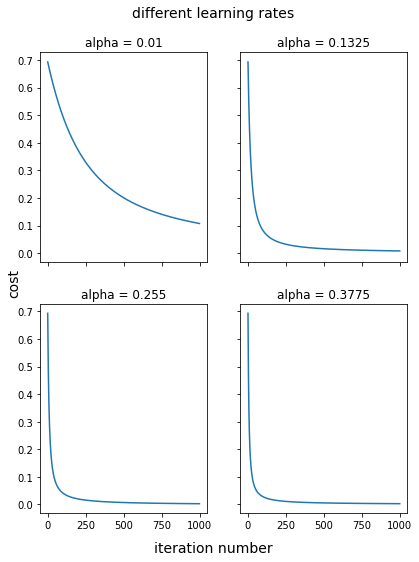

In [40]:
# Exploring different learning rates
# cost vs number_of_iterations is plotted
base_learning_rate = .01
top_learning_rate = .5
N = 4
best_lr = -1
best_accuracy = -1
fig, axs = plt.subplots(int(np.sqrt(N)+.5), int(np.sqrt(N)) , sharex = True, sharey = True, figsize=(6,8))
fig.suptitle('different learning rates', fontsize = 14)
fig.text(.5, .04, 'iteration number', va = 'center', ha = 'center', fontsize= 14)
fig.text(.04, .5, 'cost', va = 'center', ha = 'center', rotation = 'vertical', fontsize= 14)
plt.subplots_adjust(top=.9, bottom = .1, left = .1, right = .95, hspace = .2)
axs = axs.flat
for i in range(N):
  lr = base_learning_rate + (top_learning_rate - base_learning_rate) * i / N
  parameters, costs = fit_model(X, Y, dims, number_of_iterations=1000, learning_rate=lr, return_costs=True)
  axs[i].set_title('alpha = '+str(lr))
  axs[i].plot(costs)
  acc = assess_model(X,Y, parameters, [])
  if (acc > best_accuracy):
    best_accuracy = acc
    best_lr = lr
print(best_lr)
print(best_accuracy)    

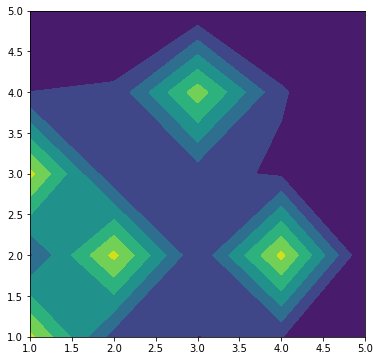

In [60]:
# exploring different values for:
# the number of layers, the number of neurons per layer
N = 5
M = 5
x_list = np.linspace(1,N,N)
y_list = np.linspace(1,M,M)
X_grid, Y_grid = np.meshgrid(x_list, y_list)
Z_grid = np.zeros(X_grid.shape)
for i in range(1,N):
  for j in range(1,M):
    dims = [X.shape[0]] + [j]*i + [Y.shape[0]]
    parameters, costs = fit_model(X, Y, dims, number_of_iterations=10000, learning_rate=.2, return_costs=True)
    acc = assess_model(X,Y, parameters, [])
    Z_grid[i-1,j-1] = costs[-1]
plt.figure(figsize=(plt.rcParams['figure.figsize'][0],plt.rcParams['figure.figsize'][0]))    
plt.contourf(X_grid, Y_grid, Z_grid)